In [15]:
import pandas as pd
from datetime import date, datetime
import re
import os
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
#Carregando arquivo excel em formato dataframe
df_treino = pd.read_excel('Amostra_split.xlsx', engine='openpyxl')
df_teste = pd.read_excel('Amostra_split_teste.xlsx')

#dataframe_original.head(5)

In [ ]:
X = df_treino.drop(['VALIDACAO'], axis=1)
y = df_treino['VALIDACAO']

balance = RandomUnderSampler(random_state=42)

X_balance, y_balance = balance.fit_resample(X,y)

df_treino_balanceado = pd.concat([X_balance,y_balance], axis=1)

df_treino_balanceado['VALIDACAO'].value_counts()

In [19]:
x = df_treino_balanceado['DS_EVOLUCAO']
y = df_treino_balanceado['VALIDACAO']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=42, train_size=0.4, stratify=y)

pipeSVC = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('clf', LinearSVC())
])

pipeCNB = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('clf', ComplementNB())
])

pipeSVC.fit(x_train, y_train)
predictSVC = pipeSVC.predict(x_test)
accuracy_score(y_test,predictSVC)
print(f'SVC: {accuracy_score(y_test,predictSVC):.2f}')

pipeCNB.fit(x_train, y_train)
predictCNB = pipeCNB.predict(x_test)
accuracy_score(y_test,predictCNB)
print(f'CNB: {accuracy_score(y_test,predictCNB):.2f}')

SVC: 0.96
CNB: 0.92


Matriz de confusão - SVC
[[369  14]
 [ 17 365]]


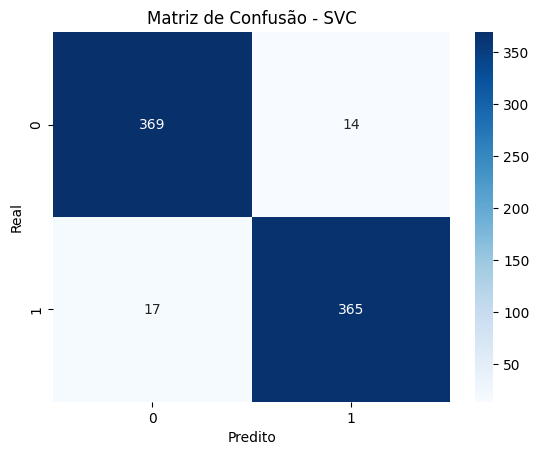


Relatório de classificação - SVC
              precision    recall  f1-score   support

           N       0.96      0.96      0.96       383
           S       0.96      0.96      0.96       382

    accuracy                           0.96       765
   macro avg       0.96      0.96      0.96       765
weighted avg       0.96      0.96      0.96       765



In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# SVC
cm_svc = confusion_matrix(y_test, predictSVC)
print("Matriz de confusão - SVC")
print(cm_svc)

sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - SVC")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

print("\nRelatório de classificação - SVC")
print(classification_report(y_test, predictSVC))



Matriz de confusão - CNB
[[354  29]
 [ 29 353]]


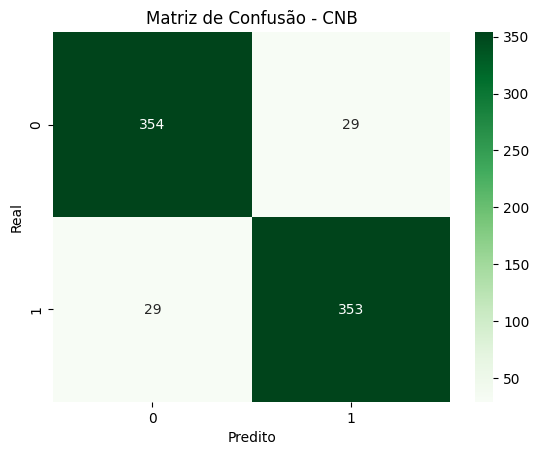


Relatório de classificação - CNB
              precision    recall  f1-score   support

           N       0.92      0.92      0.92       383
           S       0.92      0.92      0.92       382

    accuracy                           0.92       765
   macro avg       0.92      0.92      0.92       765
weighted avg       0.92      0.92      0.92       765



In [21]:
cm_cnb = confusion_matrix(y_test, predictCNB)
print("Matriz de confusão - CNB")
print(cm_cnb)

sns.heatmap(cm_cnb, annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confusão - CNB")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

print("\nRelatório de classificação - CNB")
print(classification_report(y_test, predictCNB))
